# 泰坦尼克之灾

# 背景

# 初探数据

In [173]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
%matplotlib inline

In [196]:
#导入数据集
data_train = pd.read_csv(r'D:\Jupyter Notebook\数据分析项目\titanic\train.csv')
data_test = pd.read_csv(r'D:\Jupyter Notebook\数据分析项目\titanic\train.csv')

In [175]:
data_train.head()    #查看数据结构

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [176]:
#查看表格描述信息
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


**说明**
1. 乘客的总数量为891
2. 在Age、Cabin、Embarker字段中存在的缺失值
3. Survived中，1为生存，0为遇难

|字段说明| |
|:---|:---|
|PassengerId   | 乘客id|
|Survived       |是否存活（0， 1）|
|Pclass         |舱位等级（1，2，3）|
|Name          | 乘客姓名|
|Sex            |性别|
|Age            |年龄|
|SibSp          |堂兄弟/妹个数|
|Parch          |父母与小孩个数|
|Ticket         |船票信息|
|Fare           |票价|
|Cabin          |客舱|
|Embarked       |登船港口|


In [177]:
# 查看数据的总体信息
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**说明**  
1. 训练集中包含有891名乘客
2. 平均存活率为0.38
3. 平均的舱位等级为2.3，说明2/3舱位的人比1仓多
4. 平均年龄为29.6岁，年龄跨度为0.4岁到80岁，其中50%为28岁以下，Age中包含有缺失值
5. 平均票价为32.2，其中75%左右票价均低于平均票价

# 数据初步分析

## 乘客各属性分布

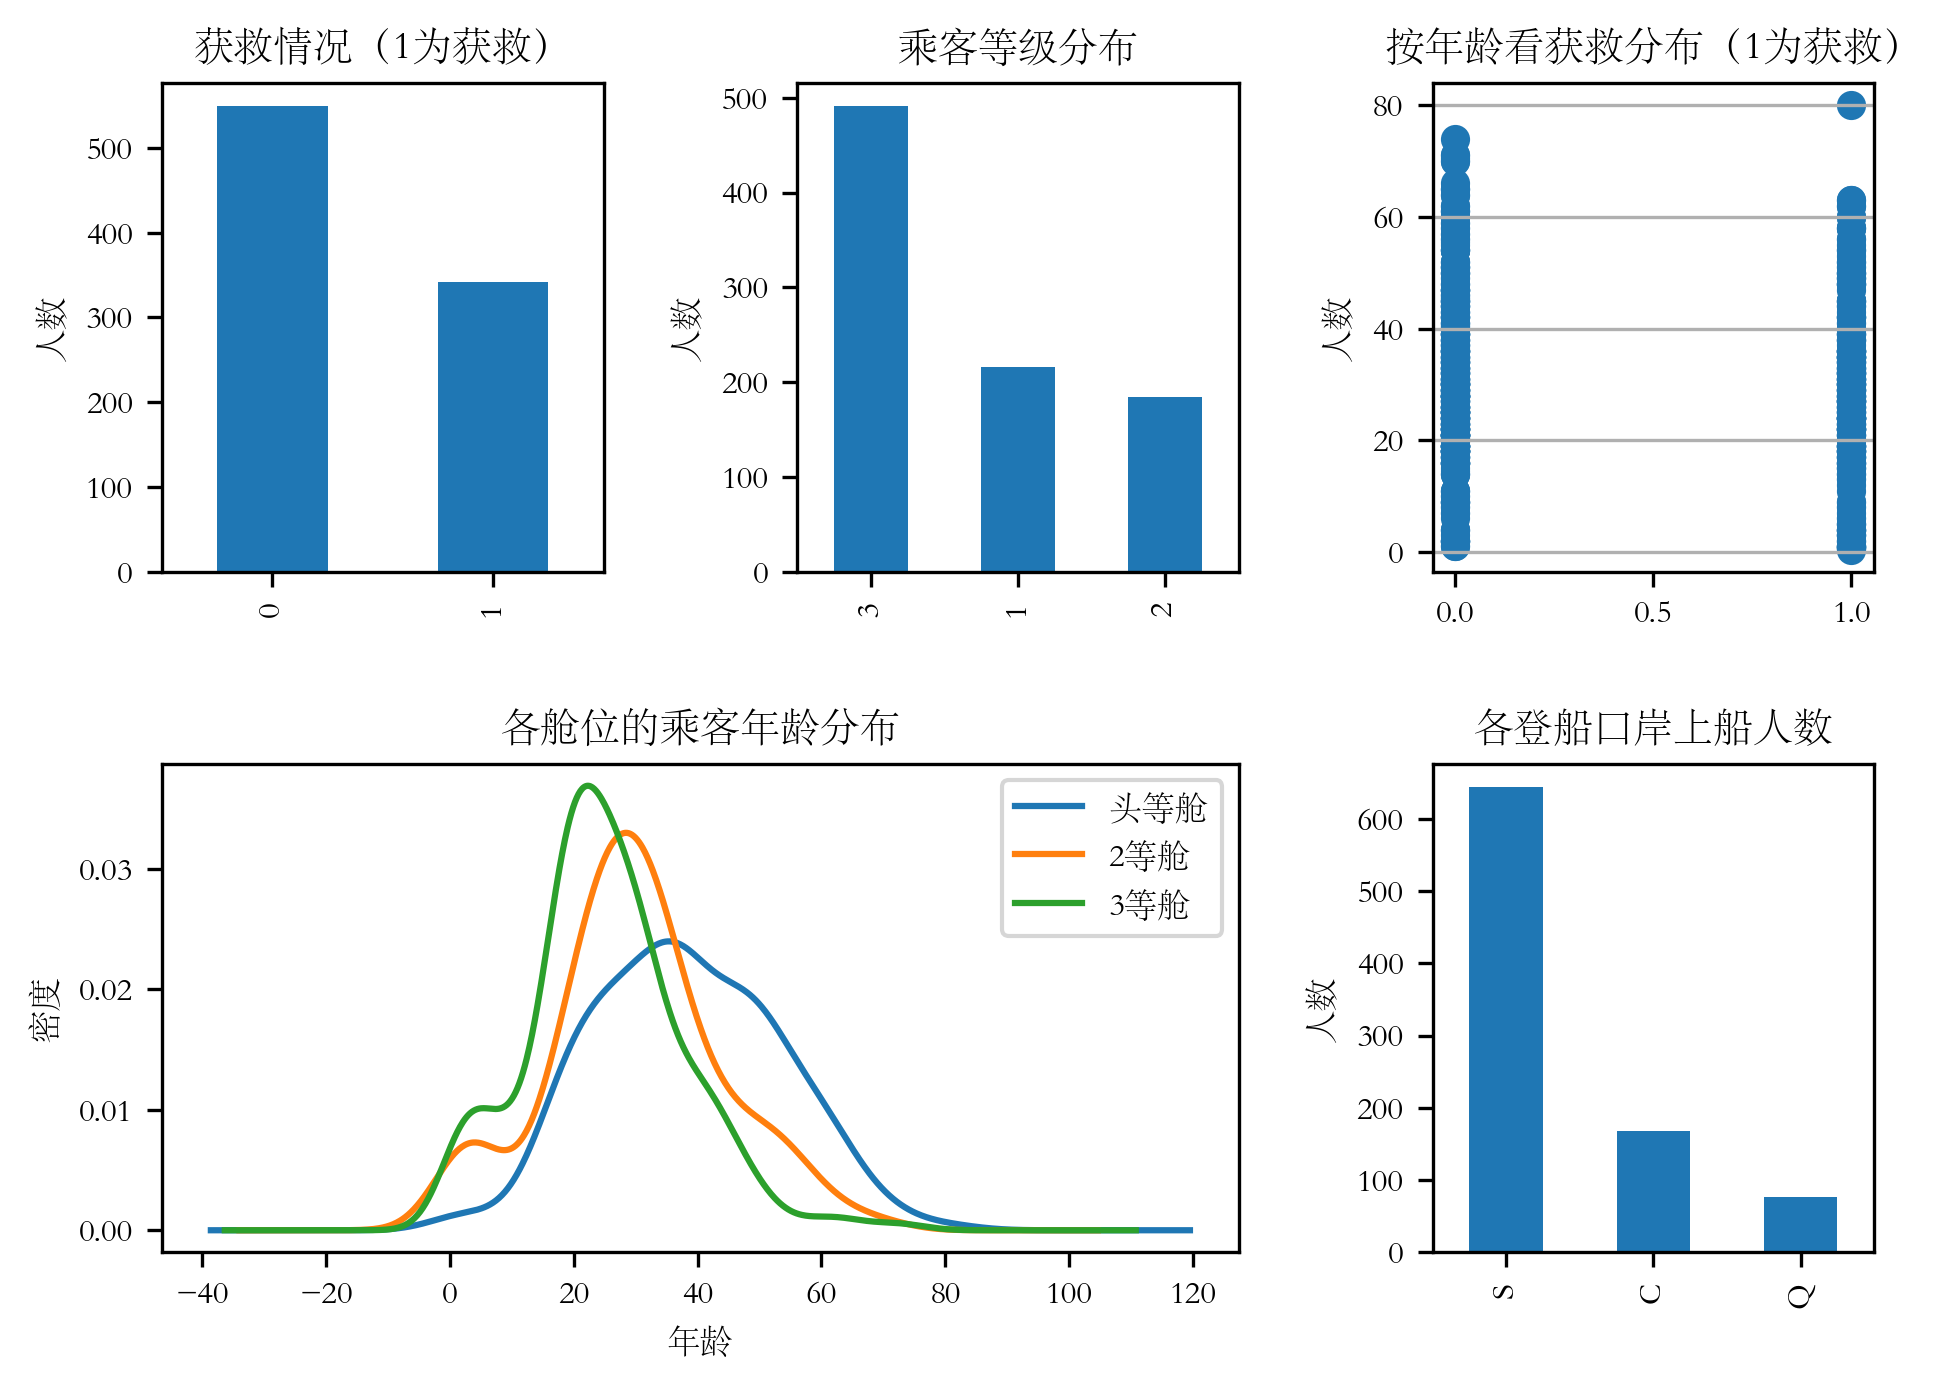

In [182]:
#设置图片的中文输入和字体大小
matplotlib.rcParams['font.family'] = 'STSong'
matplotlib.rcParams['font.size'] = 8

# 生成图片对象，设置透明度， 图片布局
fig = plt.figure(dpi=300)    
fig.set(alpha = 0.2)


plt.subplot2grid((2, 3), (0, 0))
fig.tight_layout(pad=0.3, w_pad=5.0, h_pad=4.0)
'''
调整绘图的间距和大小
pad:设置绘图区边缘与画布边缘的距离
w_pad:设置绘图区之间的水平距离
h_pad:设置绘图区之间的垂直距离
'''

#查看总体获救情况
data_train.Survived.value_counts().plot(kind = 'bar')
plt.title(u'获救情况（1为获救）') 
plt.ylabel(u'人数')


#不同舱位等级的获救情况
plt.subplot2grid((2,3), (0, 1))
data_train.Pclass.value_counts().plot(kind = 'bar')
plt.title('乘客等级分布')  
plt.ylabel('人数')

#不同年龄的获救情况
plt.subplot2grid((2, 3), (0, 2))
plt.scatter(data_train.Survived, data_train.Age)
plt.title('按年龄看获救分布（1为获救）')
plt.ylabel('人数')
plt.grid(b = True, which = 'major', axis = 'y')

#不同舱位的乘客年龄分布密度图
plt.subplot2grid((2, 3), (1, 0), colspan = 2)
data_train.Age[data_train.Pclass == 1].plot(kind = 'kde')
data_train.Age[data_train.Pclass == 2].plot(kind = 'kde')
data_train.Age[data_train.Pclass == 3].plot(kind = 'kde')
plt.xlabel('年龄')
plt.ylabel('密度')
plt.title('各舱位的乘客年龄分布')
plt.legend(('头等舱', '2等舱', '3等舱'), loc = 'best')   #设置图例

#不同港口登船人数
plt.subplot2grid((2, 3), (1, 2))
data_train.Embarked.value_counts().plot(kind = 'bar')
plt.title('各登船口岸上船人数')
plt.ylabel('人数')

plt.show()

**从上图可以看出：**
1. 总体获救的比例未到50%；
2. 在仓位分布上，3仓的人数几乎为1，2仓的人数总和；
3. 在遇难和获救的年龄跨度都很大；
4. 在不同仓位的乘客年龄分布上，总体的趋势基本一致，但高仓位的年龄分布略高，说明经济水平还是与年龄存在正相关；
5. 从S港登陆的乘客远大于其他两个登陆口岸。

**接下来的问题：**
1. 不同仓位/乘客的等级是否会影响到最后的获救概率；
2. 不同的年龄阶段是否对获救概率有影响；
3. 从不同的港口登陆是否影响获救的概率。

## 属性与获救结果的关联统计

### 不同舱位等级生存与未生存人数

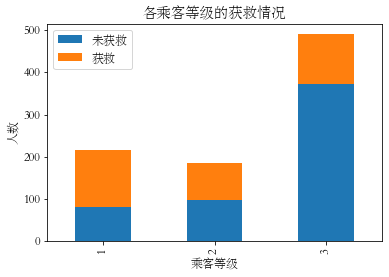

In [187]:
matplotlib.rcParams['font.family'] = 'STSong'
matplotlib.rcParams['font.size'] = 12

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()    
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts() 
df = pd.DataFrame({u'未获救' : Survived_0, u'获救' : Survived_1})    
df.plot(kind='bar', stacked=True)
plt.title(u'各乘客等级的获救情况')
plt.xlabel(u'乘客等级')
plt.ylabel(u'人数')
plt.show()


**说明：**
1仓位的获救比例明显高于其他2个仓位，而3仓的获救比例最低

### 查看性别对获救情况的影响

<Figure size 1800x1200 with 0 Axes>

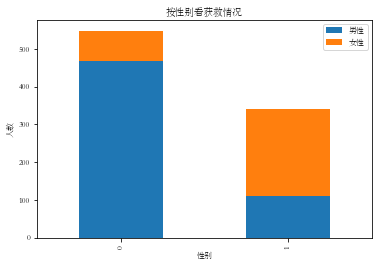

In [150]:
fig = plt.figure(dpi=300)    
fig.set(alpha = 0.2)

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df = pd.DataFrame({'男性' : Survived_m, '女性' : Survived_f})
df.plot(kind = 'bar', stacked  = True)
plt.title('按性别看获救情况')
plt.xlabel("性别")
plt.ylabel("人数")
plt.show()

**说明：**女性的获救比例明显高于男性，说明在危机关头，正如电影说所，还是Lady first

### 查看不同舱位级别下不同性别的获救情况

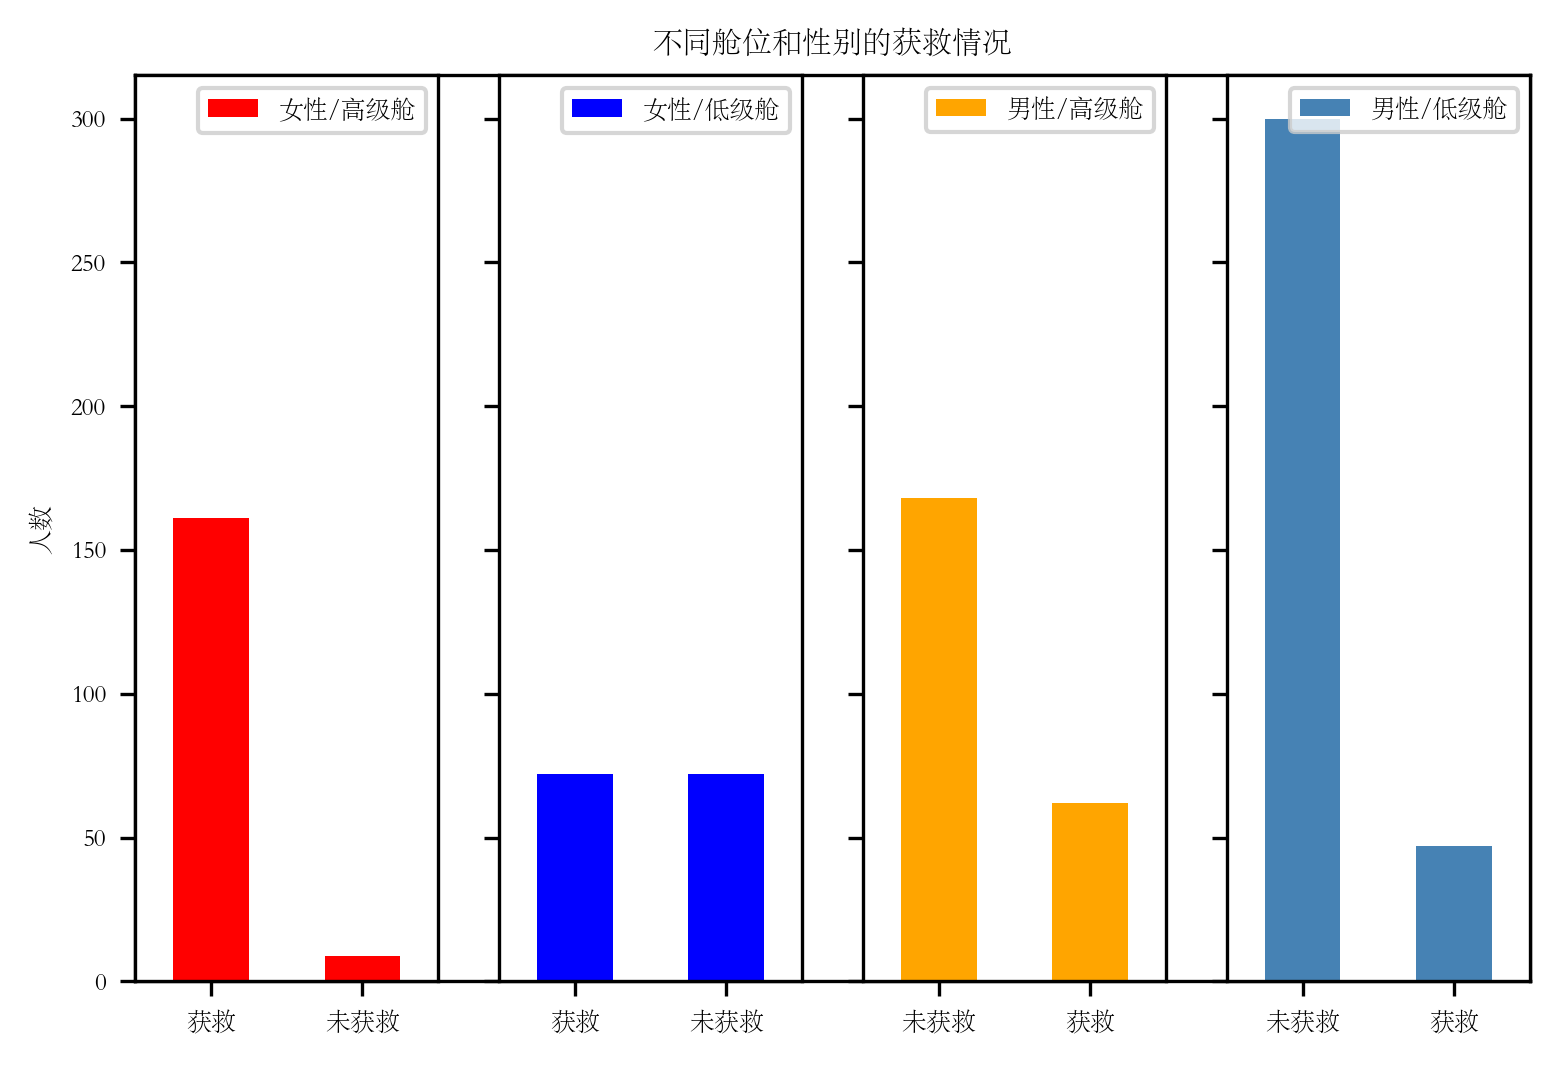

In [69]:
fig = plt.figure(dpi = 300)
fig.set(alpha = 0.2)

matplotlib.rcParams['font.family'] = 'STSong'   #设置图片中文输入
matplotlib.rcParams['font.size'] = 6   #设置全局字体大小
plt.title('不同舱位和性别的获救情况')
plt.xticks([])  # 隐藏刻度
plt.yticks([])

#统计高级舱位女性生存情况
ax1 = fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind = 'bar', color = 'red')
ax1.set_xticklabels(['获救', '未获救'], rotation = 0)
ax1.legend(['女性/高级舱'], loc = 'best')
plt.ylabel('人数')

#统计低级舱位女性生存情况
ax2 = fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind = 'bar', color = 'blue')
ax2.set_xticklabels(['获救', '未获救'], rotation = 0)
plt.legend(['女性/低级舱'], loc = 'best')

#统计高级舱位男性生存情况
ax3 = fig.add_subplot(143,sharey=ax1 )
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind = 'bar', color = 'orange')
ax3.set_xticklabels(['未获救', '获救'], rotation = 0)
plt.legend(['男性/高级舱'], loc = 'best')

#统计低级舱位男性生存情况
ax4 = fig.add_subplot(144,sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind = 'bar', color = 'steelblue')
ax4.set_xticklabels(['未获救', '获救'], rotation = 0)
plt.legend(['男性/低级舱'], loc = 'best')
plt.show()

**说明**：    
高级仓位的女性获救概率最高，低级仓位的男性获救概率最低；  
低级仓也有将近一半的人数获救；  
总体女性的获救概率大于大于男性。

### 查看不同港口的获救情况

<Figure size 1800x1200 with 0 Axes>

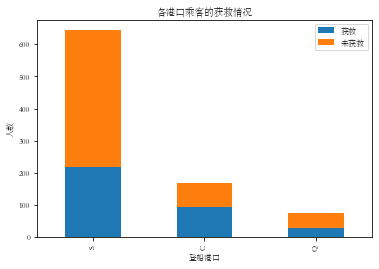

In [151]:
fig = plt.figure(dpi=300)    
fig.set(alpha = 0.2)

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'获救': Survived_1, '未获救' : Survived_0})
df.plot(kind = 'bar', stacked = True)
plt.title("各港口乘客的获救情况")
plt.xlabel("登船港口")
plt.ylabel("人数")
plt.show()

**说明**：在不同港口登陆似乎对获救概率似乎并未太大影响，其中C港登陆的获救概率更高。

### 查看有无兄弟/姐妹（SibSp），父母/孩子（Patch）对获救的影响

<Figure size 1800x1200 with 0 Axes>

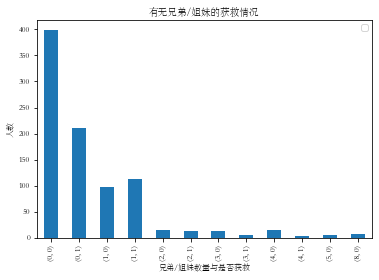

In [152]:
fig = plt.figure(dpi=300)    
fig.set(alpha = 0.2)
g = data_train.groupby(['SibSp', 'Survived'])  # 按有无亲戚和是否获救分组统计
df = DataFrame(g.count()['PassengerId'])  # 按编号统计人数
df.plot(kind="bar")
plt.title("有无兄弟/姐妹的获救情况")
plt.xlabel("兄弟/姐妹数量与是否获救")
plt.ylabel("人数")
plt.legend([])
plt.show()

<Figure size 1800x1200 with 0 Axes>

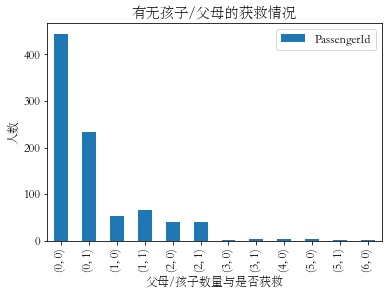

In [189]:
fig = plt.figure(dpi=300)    
fig.set(alpha = 0.2)
g = data_train.groupby(['Parch', 'Survived']) #按有无父母/孩子和是否获救
df = DataFrame(g.count()['PassengerId'])    #按编号统计人数
df.plot(kind='bar')
plt.title("有无孩子/父母的获救情况")
plt.xlabel("父母/孩子数量与是否获救")
plt.ylabel("人数")
# plt.legend([])
plt.show()

**说明**：没有兄弟/姐妹，孩子/父母的获救率相多于有兄弟/妹，孩子/父母的获救率低，在灾难面前，有个亲属似乎更加能够抗击风险。  
*（横坐标元组中，第一个元素表示，兄弟/姐妹、父母/孩子的数量，后一个元素的0表示遇难，1表示获救）*

### tickets cabin分析
tickets为船票的编号，应该为唯一值，cabin字段中只有204个值，存在着缺失值

In [12]:
#查看Cabin字段分布情况
data_train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
F33            3
              ..
E58            1
C104           1
D10 D12        1
E31            1
D9             1
Name: Cabin, Length: 147, dtype: int64

**说明：**
cabin字段的数据含义不清晰，暂不明白字母和数字所代表的含义，本身存在缺失值，并且数据集中度不高。

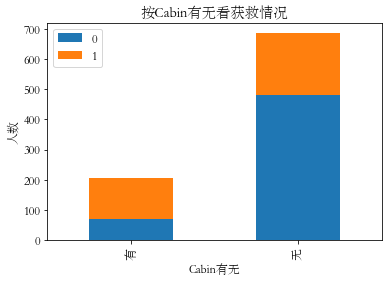

In [191]:
# 先在有无Cabin信息这个粗粒度上看看Survived的情况
Survived_Cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_noCabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df = pd.DataFrame({'有' : Survived_Cabin, '无' : Survived_noCabin}).transpose()
df.plot(kind = 'bar', stacked = True)
plt.title('按Cabin有无看获救情况')
plt.xlabel('Cabin有无')
plt.ylabel('人数')
plt.legend(loc='upper left')
plt.show()

**说明：** 有船票记录的获救概率略高，可能存在获救后的重新登记过，不过这样只是一个猜想。

# 简单数据预处理

**缺失值的处理方式：**  
- 缺失的比例较高，可以直接舍弃
- 缺失的情况适中，缺失的数据为非连续型的数据类型，可以将NaN作为新的类型
- 对于连续型的缺失值，可以设置step，将连续数据离散化
- 少量缺失可以根据现有数据进行拟合填补

In [197]:
# 用scikit-learn中的RandomForest来拟合一下缺失的年龄数据
from sklearn.ensemble import RandomForestRegressor

#使用RandomForestRegressor填补确实的年龄属性
def set_missing_ages(df):
    
    # 提取已有数据型特征，放入RandomForestRegressor
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    
    Y = known_age[:, 0]     #目标年龄
    X = known_age[:, 1:]    #特征属性值

    # fit到RandomForestRegressor中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, Y)

    # 用得到的模型进行未知年龄结果预测
    predicteAges = rfr.predict(unknown_age[:, 1::])

    # 用得到的预测结果填补缺失数据
    df.loc[(df.Age.isnull()), 'Age'] = predicteAges
    return df, rfr

def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = 'Yes'
    df.loc[(df.Cabin.isnull()), 'Cabin'] = 'No'
    return df

data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
data_train


C:\Users\llk\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\llk\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,No,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,No,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,Yes,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,16.19395,1,2,W./C. 6607,23.4500,No,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,Yes,C


逻辑回归建模时，需要输入的特征都是数值型特征，先对类目型的特征因子化  
以Cabin为例，原本一个属性维度，因为其取值可以是[‘yes’,‘no’]，而将其平展开为’Cabin_yes’,'Cabin_no’两个属性  
- 原本Cabin取值为yes的，在此处的"Cabin_yes"下取值为1，在"Cabin_no"下取值为0  
- 原本Cabin取值为no的，在此处的"Cabin_yes"下取值为0，在"Cabin_no"下取值为1  


In [15]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [198]:
# 构建特征值
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix = 'Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix='Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix='Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix='Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,...,1,0,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,...,0,1,1,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,...,1,0,0,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,...,0,1,0,0,1,1,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,...,1,0,0,0,1,0,1,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,...,0,1,0,0,1,1,0,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,16.19395,1,2,W./C. 6607,23.4500,...,1,0,0,0,1,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,...,0,1,1,0,0,0,1,1,0,0


In [199]:
# Age和Fare两个属性，乘客的数值幅度变化较大
# 用scikit-learn里面的preprocessing模块将Age和Fare特征化到[-1,1]之内。
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'].values.reshape(-1, 1))
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1, 1), age_scale_param)
fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1, 1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1, 1), fare_scale_param)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,...,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,...,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,...,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,...,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,...,0,0,1,0,1,0,0,1,0.392942,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,...,0,0,1,0,1,0,1,0,-0.194333,-0.386671
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,...,0,0,1,1,0,1,0,0,-0.781608,-0.044381
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,16.19395,1,2,W./C. 6607,23.4500,...,0,0,1,1,0,0,0,1,-0.987599,-0.176263
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,...,1,0,0,0,1,1,0,0,-0.267742,-0.044381


## 逻辑回归建模

In [202]:
# 提取feature字段，转成numpy格式，使用scikit-learn中的LogisticRegression建模
from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)
clf


C:\Users\llk\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\llk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=1e-06, verbose=0,
                   warm_start=False)

In [203]:
# 对训练集和测试集做预处理
data_test = pd.read_csv(r'D:\Jupyter Notebook\数据分析项目\titanic\test.csv')
data_test.loc[(data_test.Fare.isnull()), 'Fare'] = 0
# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tem_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tem_df[data_test.Age.isnull()].as_matrix()
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1, 1), age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1, 1), fare_scale_param)
df_test

C:\Users\llk\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,30.705727,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.019545,-0.492680
414,1306,39.000000,0,0,108.9000,0,1,1,0,0,1,0,1,0,0,0.649061,1.314641
415,1307,38.500000,0,0,7.2500,1,0,0,0,1,0,1,0,0,1,0.611112,-0.507017
416,1308,30.705727,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.019545,-0.492680


In [207]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv(r"D:\Jupyter Notebook\数据分析项目\titanic\train.csvlogistic_regression_predictions.csv", index=False)
result

C:\Users\llk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 逻辑回归系统优化

In [208]:
pd.DataFrame({"columns":list(train_df.columns)[1:], "coef":list(clf.coef_.T)})

,columns,coef
0,SibSp,[-0.34423579280725725]
1,Parch,[-0.10491554806643882]
2,Cabin_No,[-0.04868894631435548]
3,Cabin_Yes,[0.8534101289347]
4,Embarked_C,[0.0]
5,Embarked_Q,[0.0]
6,Embarked_S,[-0.41726175724692055]
7,Sex_female,[2.0052561680303707]
8,Sex_male,[-0.6287362331555014]
9,Pclass_1,[0.3411707081844862]
